In [1]:
import drjit as dr
import numpy as np
import mitsuba as mi 
mi.set_variant("cuda_ad_rgb")
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import sys
sys.path.append("../../")
from PDE2D.Coefficient import *
from PDE2D.utils import *
from mitsuba import Point2f, Float
from PDE2D.BoundaryShape import CircleShape

In [2]:
origin = [0,0]
radius = 1
res = 64
i_radius = radius
resolution = [512, 512]
bbox = [[origin[0] - radius * 1.1, origin[1] - radius * 1.1],
        [origin[0] + radius * 1.1, origin[1] + radius * 1.1]]
origin_s = point2sketch(Point2f(origin), bbox, resolution)
radius_x, radius_y, _ = dist2sketch(radius, bbox, resolution)
i_radius_x, i_radius_y, _ = dist2sketch(i_radius, bbox, resolution)

out_val = 1
image = np.array([[0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
                  [0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
                  [10, 16, 32, 16,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
                  [0,  0, 16, .5, .5, .5, .5, .3, .0,  0,  0,  0,  0,  0,  0,  0],
                  [0,  0,  0,  2,  8,  6,  6,  2,  0,  0,  0,  0,  0,  0,  0,  0],
                  [0, .5,  1,  2,  8,  8,  3,  2,  0,  0,  0,  0,  0,  0,  0,  0],
                  [0,  1,  2,  3,  8,  8,  8,  3,  2,  0,  0,  0,  0,  0,  0,  0],
                  [0,  1,  2,  3,  4,  4,  5,  6,  2,  2,  0,  0,  0,  0,  0,  0],
                  [10,  1,  1,  1,  2,  2,  3,  3,  1,  1,  0,-.4,-.4,-.4,  0,  0],
                  [10, .5, .5,  0,  0,  0,  0,  0,  0,  0,-.7,-.8,-.4,  0,  0,  0],
                  [0,  0,  0,  0,  0,  2,  0,  0,  0,  0,-.8,-.8,-.3,-.3,  0,  0],
                  [0,  0,  0,  0,  2,  0,  0,  1,  0,  0,-.8,-.9,-.9,-.9,-.3,  0],
                  [1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,-.4,-.4,-.3,  0,  0],
                  [1,  1,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
                  [1,  1,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
                  [1,  1,  2,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])
#image += out_val
image = np.ones([res, res], dtype = np.float16) *50
shape = CircleShape(radius = radius)
grad_points, _, _ = shape.create_boundary_points(res = 256, spp =2, discrete_points= True, distance = 0)
coeff = TextureCoefficient("test", bbox, image, grad_zero_points= grad_points, out_val = out_val)

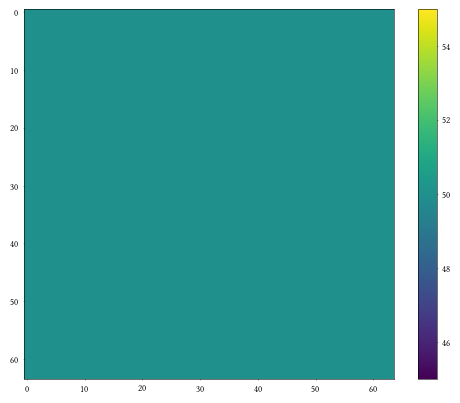

In [3]:
plt.imshow(coeff.tensor.numpy())
plt.colorbar()

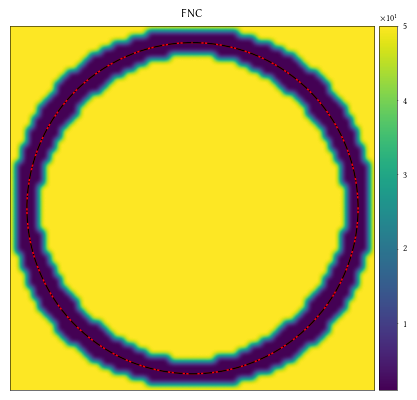

In [4]:
spp = 128
fd_step = 1e-2
points = create_image_points(bbox, resolution, spp)
fnc_vals = coeff.get_value(points)
image_, tensor_ = create_image_from_result(fnc_vals, resolution)
fig, (ax1) = plt.subplots(1, 1, figsize=[5, 5])
plot_image(image_[0], ax1)
ax1.set_title("FNC")

sphere1 = patches.Ellipse(origin_s, radius_x * 2, radius_y * 2, linewidth= 1,
                                fill = False, color = "red")
sphere2 = patches.Ellipse(origin_s, i_radius_x * 2, i_radius_y * 2, linewidth= 1,
                                fill = False, color = "black", ls = "-.")
ax1.add_patch(sphere1)
ax1.add_patch(sphere2)


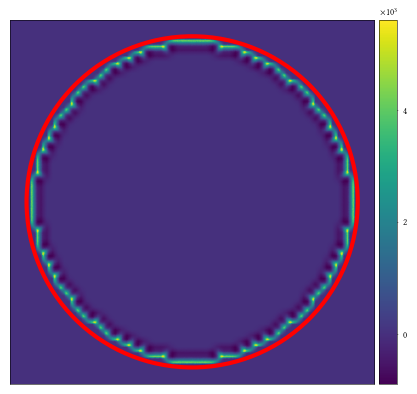

In [5]:
from PDE2D.Solver import DataHolder
data_holder = DataHolder(shape, α = coeff)
fig, ax = plt.subplots(1,1, figsize = (5,5))
data_holder.eff_screening_tex.visualize(ax, bbox, resolution)
shape.sketch(ax, bbox, resolution)


In [6]:
points = create_circle_points(radius = i_radius * (1 - 1e-6))
fnc = coeff.get_value(points)
grad, laplacian = coeff.get_grad_laplacian(points)
fnc, _ = create_circle_from_result(fnc)
gradx, _ = create_circle_from_result(grad[0])
grady, _ = create_circle_from_result(grad[1])
laplacian, _ = create_circle_from_result(laplacian)


Text(0.5, 1.0, 'Function')

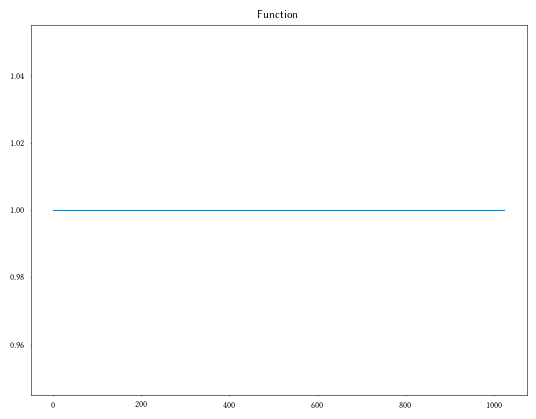

In [7]:
plt.plot(fnc)
plt.title("Function")

Text(0.5, 1.0, 'Gradients')

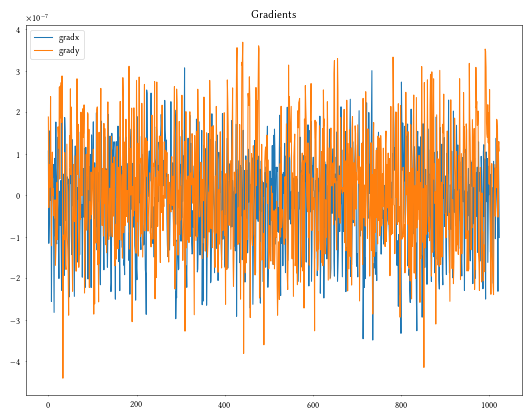

In [8]:
plt.plot(gradx, label = "gradx")
plt.plot(grady, label = "grady")
plt.legend()
plt.title("Gradients")

Text(0.5, 1.0, 'Laplacian')

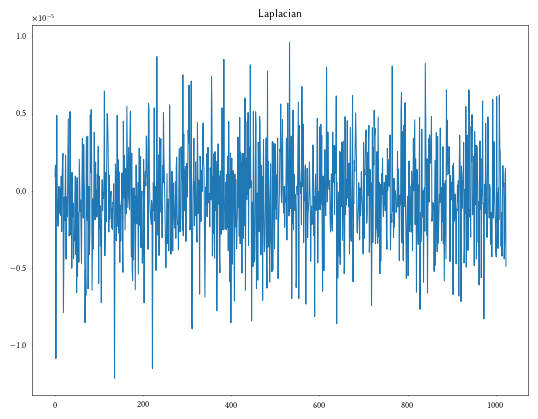

In [9]:
plt.plot(laplacian)
plt.title("Laplacian")